In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
from os import listdir
from os.path import isfile, join
path = '/drive/My Drive/mhar_test_times_p100/'
files = [path + f for f in listdir(path)]

In [ ]:
df = []

for p_df in files:
  df_ = pd.read_csv(p_df)
  df_['file'] = p_df
  df.append(df_)

df = pd.concat(df, ignore_index=True)
df.head()  

,n,z,time,thi,gpu,figure,samples_sec,file
0,2500,500,63.91,10000,p100,simplex,"78,232.81",/drive/My Drive/mhar_test_times_p100/733765323...
1,2500,1000,128.61,10000,p100,simplex,"77,755.32",/drive/My Drive/mhar_test_times_p100/733765323...
2,5000,500,241.73,10000,p100,simplex,"20,683.85",/drive/My Drive/mhar_test_times_p100/733765323...
3,5000,1000,445.13,10000,p100,simplex,"22,465.34",/drive/My Drive/mhar_test_times_p100/733765323...
4,2500,500,63.91,10000,p100,simplex,"78,229.69",/drive/My Drive/mhar_test_times_p100/464637403...


In [ ]:
df['total_points'] = df['z']*df['thi']
df['count'] = 1
enough = df.groupby(['figure', 'z', 'total_points', 'n'], as_index=False)['count'].sum()
del df['count']
df = df.merge(enough,on=['figure', 'z', 'total_points', 'n'])
df = df[df['count']>=10]
df.head(3)

,n,z,time,thi,gpu,figure,samples_sec,file,total_points,count
0,2500,500,63.91,10000,p100,simplex,"78,232.81",/drive/My Drive/mhar_test_times_p100/733765323...,5000000,11
1,2500,500,63.91,10000,p100,simplex,"78,229.69",/drive/My Drive/mhar_test_times_p100/464637403...,5000000,11
2,2500,500,63.91,10000,p100,simplex,"78,232.32",/drive/My Drive/mhar_test_times_p100/397896345...,5000000,11


In [ ]:
# df = df.sort_values(['figure', 'n', 'z','samples_sec'], ascending=False).groupby(['figure','n','z', 'thi', 'total_points'], as_index=False).head(10)
# from shutil import copyfile
# for f in df['file']:
#   new_f = f.replace('/drive/My Drive/mhar_test_times_2/','')
#   new_f = '/drive/My Drive/mhar_test_times_p100/' + new_f
#   print(new_f)

#   copyfile(f, new_f)

In [ ]:
df_times = df.copy()
df_times.rename(columns={'samples_sec':'samples_per_sec_', 'time':'time_',}, 
                inplace=True)
df_times = df_times.groupby(['figure', 'n','z', 'total_points'], as_index=False).agg(
    {'samples_per_sec_':['mean', 'std'], 'time_':['mean', 'std']}
)
df_times.columns = [a[0] + a[1] for a in df_times.columns]
df_times.head(1)

,figure,n,z,total_points,samples_per_sec_mean,samples_per_sec_std,time_mean,time_std
0,hypercube,3,1,30000,"2,415.78",485.75,13.12,3.84


In [ ]:
df_best_times = df_times.groupby(['figure', 'n'],
                                 as_index=False)['samples_per_sec_mean'].max()


df_best_times= df_times[df_times['samples_per_sec_mean'].isin(
    df_best_times['samples_per_sec_mean'])].sort_values(['n'])
df_show = df_best_times.copy()
df_show = df_show.rename(columns={
    'figure':'Figure',
    'total_points': 'Points Sampled',
}
)

df_show.head(1)

,Figure,n,z,Points Sampled,samples_per_sec_mean,samples_per_sec_std,time_mean,time_std
5,hypercube,3,10000,300000000,"25,357,073.87","675,444.40",11.84,0.32


In [ ]:
pd.set_option('float_format', '{:,.2f}'.format)
df_show.columns = pd.MultiIndex.from_tuples([
    ('', 'Figure'), ('', 'n'), ('','z'), ('', 'Points Sampled'),
    ('Points Sampled Per Second', 'mean'), ('Points Sampled Per Second', 'std'),
                           ('Running Time', 'mean'), ('Running Time', 'std')
])
df_show.replace( {'simplex':'Simplex', 'hypercube':'Hypercube'}, inplace=True)
df_show

... Points Sampled Per Second Running Time     
        Figure     n      z  ...                       std         mean  std
5    Hypercube     3  10000  ...                675,444.40        11.84 0.32
61     Simplex     3  10000  ...              2,628,558.29        15.38 1.81
67     Simplex     5  10000  ...              1,258,481.83        13.15 0.77
11   Hypercube     5  10000  ...                376,068.96        22.73 0.66
73     Simplex    15  10000  ...                302,854.48        12.36 0.16
17   Hypercube    15  10000  ...                655,021.48        11.84 0.31
79     Simplex    25  10000  ...                168,300.75        12.33 0.08
22   Hypercube    25   5000  ...              1,236,619.81        14.07 2.28
85     Simplex    50  10000  ...                 16,403.51        22.34 0.03
27   Hypercube    50   2500  ...                612,241.73        14.83 2.54
89     Simplex   100   3000  ...                135,616.62        12.41 0.23
34   Hypercube   100   4000  ...                 10,619.65        27.50 0.07
95     Simplex   250   4000  ...                  4,440.59        45.17 0.08
38   Hypercube   250   3000  ...                  8,630.27        73.81 0.53
100    Simplex   300   4000  ...                  1,199.00        51.82 0.03
44   Hypercube   500   4000  ...                    782.70       193.06 0.24
103    Simplex   500   1500  ...                    583.24        47.63 0.03
49   Hypercube  1000   4000  ...                    182.97       482.87 0.36
107    Simplex  1000    500  ...                    556.62        45.55 0.08
52   Hypercube  2500   1500  ...                     15.02       295.22 0.09
111    Simplex  2500    500  ...                  3,045.62        64.78 2.86
54   Hypercube  5000   1000  ...                      5.92       618.75 0.23
114    Simplex  5000   1000  ...                     62.27       445.68 1.25

[23 rows x 8 columns]

In [ ]:
df_show.sort_values([('','Figure'), ('','n')]).to_latex(index=False)


'\\begin{tabular}{lrrrrrrr}\n\\toprule\n           & \\multicolumn{2}{l}{Points Sampled Per Second} & \\multicolumn{2}{l}{Running Time} \\\\\n    Figure &     n &      z & Points Sampled &                      mean &          std &         mean &  std \\\\\n\\midrule\n Hypercube &     3 &  10000 &      300000000 &             25,357,073.87 &   675,444.40 &        11.84 & 0.32 \\\\\n Hypercube &     5 &  10000 &      300000000 &             13,206,089.93 &   376,068.96 &        22.73 & 0.66 \\\\\n Hypercube &    15 &  10000 &      300000000 &             25,344,794.68 &   655,021.48 &        11.84 & 0.31 \\\\\n Hypercube &    25 &   5000 &      150000000 &             10,839,474.35 & 1,236,619.81 &        14.07 & 2.28 \\\\\n Hypercube &    50 &   2500 &       75000000 &              5,151,516.81 &   612,241.73 &        14.83 & 2.54 \\\\\n Hypercube &   100 &   4000 &      120000000 &              4,363,525.70 &    10,619.65 &        27.50 & 0.07 \\\\\n Hypercube &   250 &   3000 &      

In [ ]:
df_show[('','mixing_time')] = df_show[('','n')]*df_show[('','n')]
df_show[('','one_point')] = df_show[('','mixing_time')]/df_show[
                                    ('Points Sampled Per Second','mean')]
df_show

... Running Time                      
        Figure     n      z  ...          std mixing_time one_point
5    Hypercube     3  10000  ...         0.32           9      0.00
61     Simplex     3  10000  ...         1.81           9      0.00
67     Simplex     5  10000  ...         0.77          25      0.00
11   Hypercube     5  10000  ...         0.66          25      0.00
73     Simplex    15  10000  ...         0.16         225      0.00
17   Hypercube    15  10000  ...         0.31         225      0.00
79     Simplex    25  10000  ...         0.08         625      0.00
22   Hypercube    25   5000  ...         2.28         625      0.00
85     Simplex    50  10000  ...         0.03        2500      0.00
27   Hypercube    50   2500  ...         2.54        2500      0.00
89     Simplex   100   3000  ...         0.23       10000      0.00
34   Hypercube   100   4000  ...         0.07       10000      0.00
95     Simplex   250   4000  ...         0.08       62500      0.02
38   Hypercube   250   3000  ...         0.53       62500      0.05
100    Simplex   300   4000  ...         0.03       90000      0.04
44   Hypercube   500   4000  ...         0.24      250000      0.40
103    Simplex   500   1500  ...         0.03      250000      0.26
49   Hypercube  1000   4000  ...         0.36     1000000      4.02
107    Simplex  1000    500  ...         0.08     1000000      3.04
52   Hypercube  2500   1500  ...         0.09     6250000    123.01
111    Simplex  2500    500  ...         2.86     6250000     80.84
54   Hypercube  5000   1000  ...         0.23    25000000  1,546.87
114    Simplex  5000   1000  ...         1.25    25000000  1,114.20

[23 rows x 10 columns]

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


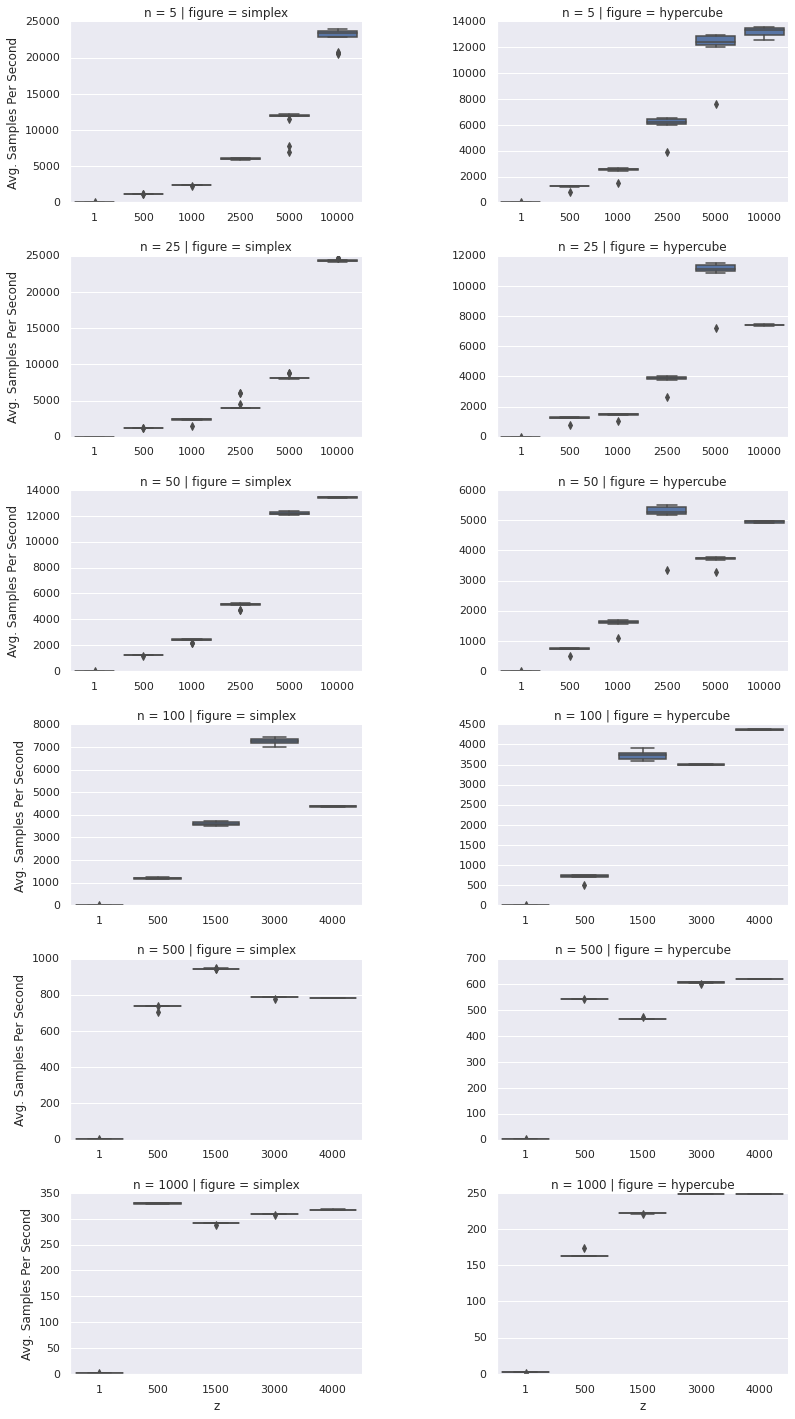

In [ ]:
df_pad = df.copy()
kws = dict(hue='z')
df_pad = df_pad[df_pad['n'].isin([5,25, 50, 100, 500, 1000])]
df_pad['samples_sec'] = (df_pad['samples_sec'])/1000
df_pad.rename(inplace=True, columns={'samples_sec':'Avg. Samples Per Second'})
g = sns.FacetGrid(df_pad, col="figure",  row="n",sharex=False, sharey=False)
g.map(sns.boxplot,"z",'Avg. Samples Per Second')
g.fig.set_size_inches(13,20)
#g.savefig('/drive/My Drive/mhar_images/paddig_boxplot.png')

In [ ]:

df

,n,z,time,thi,gpu,figure,samples_sec,file,total_points,count
0,2500,500,63.91,10000,p100,simplex,"78,232.81",/drive/My Drive/mhar_test_times_p100/733765323...,5000000,11
1,2500,500,63.91,10000,p100,simplex,"78,229.69",/drive/My Drive/mhar_test_times_p100/464637403...,5000000,11
2,2500,500,63.91,10000,p100,simplex,"78,232.32",/drive/My Drive/mhar_test_times_p100/397896345...,5000000,11
3,2500,500,63.91,10000,p100,simplex,"78,229.06",/drive/My Drive/mhar_test_times_p100/594227971...,5000000,11
4,2500,500,63.91,10000,p100,simplex,"78,233.94",/drive/My Drive/mhar_test_times_p100/706476221...,5000000,11
...,...,...,...,...,...,...,...,...,...,...
1372,50,10000,60.41,30000,p100,hypercube,"4,966,051.67",/drive/My Drive/mhar_test_times_p100/761419596...,300000000,10
1373,50,10000,60.56,30000,p100,hypercube,"4,953,713.05",/drive/My Drive/mhar_test_times_p100/843252136...,300000000,10
1374,50,10000,61.06,30000,p100,hypercube,"4,912,820.76",/drive/My Drive/mhar_test_times_p100/107858021...,300000000,10
1375,50,10000,61.12,30000,p100,hypercube,"4,908,710.65",/drive/My Drive/mhar_test_times_p100/891503189...,300000000,10


In [ ]:
path = '/drive/My Drive/tommi_times/'
files = [path + f for f in listdir(path)]

har = []
for f in files:
  har.append(pd.read_csv(f))

har = pd.concat(har, ignore_index=True)
har.columns = [c.lower() for c in har.columns]
har['total_points'] = har['iter'] * har['samples']
har['samples_sec'] = har['total_points'] / har['time']
har.rename(inplace=True,
           columns={
               'dim':'n',
               'type':'figure'
           })
har['figure'] = har['figure'].apply(lambda x: 'hypercube' if x==1 else 'simplex')
har

,time,figure,n,samples,iter,thinning,total_points,samples_sec
0,"28,866.49",simplex,250,1,30000,30000,30000,1.04
1,528.40,simplex,100,1,30000,30000,30000,56.77
2,27.96,simplex,50,1,30000,30000,30000,"1,072.88"
3,1.64,simplex,25,1,30000,30000,30000,"18,266.74"
4,0.03,simplex,5,1,30000,30000,30000,"993,385.18"
...,...,...,...,...,...,...,...,...
105,4.44,hypercube,500,1,30000,30000,30000,"6,753.44"
106,0.75,hypercube,100,1,30000,30000,30000,"40,022.43"
107,0.11,hypercube,50,1,30000,30000,30000,"279,877.75"
108,0.05,hypercube,25,1,30000,30000,30000,"592,960.20"


In [ ]:
har_times = har.copy()
har_times.rename(columns={'samples_sec':'samples_per_sec_', 'time':'time_',}, 
                inplace=True)
har_times = har_times.groupby(['figure', 'n', 'total_points'], as_index=False).agg(
    {'samples_per_sec_':['mean', 'std'], 'time_':['mean', 'std']}
)
har_times.columns = [a[0] + a[1] for a in har_times.columns]


har_best_times = har_times.groupby(['figure', 'n'],
                                 as_index=False)['samples_per_sec_mean'].max()


har_best_times= har_times[har_times['samples_per_sec_mean'].isin(
    har_best_times['samples_per_sec_mean'])].sort_values(['n'])
har_show = har_best_times.copy()
har_show = har_show.rename(columns={
    'figure':'Figure',
    'total_points': 'Points Sampled',
}
)


pd.set_option('float_format', '{:,.2f}'.format)
har_show.columns = pd.MultiIndex.from_tuples([
    ('', 'Figure'), ('', 'n'), ('', 'Points Sampled'),
    ('Points Sampled Per Second', 'mean'), ('Points Sampled Per Second', 'std'),
                           ('Running Time', 'mean'), ('Running Time', 'std')
])
har_show.replace( {'simplex':'Simplex', 'hypercube':'Hypercube'}, inplace=True)
har_show.head(1)


... Points Sampled Per Second Running Time     
      Figure  n Points Sampled  ...                       std         mean  std
0  Hypercube  5          30000  ...                 57,727.69         0.03 0.00

[1 rows x 7 columns]

In [ ]:
mhar = df_show.copy()
del mhar[('', 'mixing_time')]
del mhar[('', 'one_point')]

mhar_columns = [
                   ('', 'Figure'),
                   ('', 'n'),
                   ('', 'z'),
                   ('Tot. Samples', 'MHAR'),
                   ('Points Sampled Per Second', 'MHAR mean'),
                   ('Points Sampled Per Second', 'MHAR std'),
                  ('Running Time', 'MHAR mean'),
                   ('Running Time', 'MHAR std')
]
mhar.columns = pd.MultiIndex.from_tuples(mhar_columns)
mhar

... Points Sampled Per Second Running Time         
        Figure     n      z  ...                  MHAR std    MHAR mean MHAR std
5    Hypercube     3  10000  ...                675,444.40        11.84     0.32
61     Simplex     3  10000  ...              2,628,558.29        15.38     1.81
67     Simplex     5  10000  ...              1,258,481.83        13.15     0.77
11   Hypercube     5  10000  ...                376,068.96        22.73     0.66
73     Simplex    15  10000  ...                302,854.48        12.36     0.16
17   Hypercube    15  10000  ...                655,021.48        11.84     0.31
79     Simplex    25  10000  ...                168,300.75        12.33     0.08
22   Hypercube    25   5000  ...              1,236,619.81        14.07     2.28
85     Simplex    50  10000  ...                 16,403.51        22.34     0.03
27   Hypercube    50   2500  ...                612,241.73        14.83     2.54
89     Simplex   100   3000  ...                135,616.62        12.41     0.23
34   Hypercube   100   4000  ...                 10,619.65        27.50     0.07
95     Simplex   250   4000  ...                  4,440.59        45.17     0.08
38   Hypercube   250   3000  ...                  8,630.27        73.81     0.53
100    Simplex   300   4000  ...                  1,199.00        51.82     0.03
44   Hypercube   500   4000  ...                    782.70       193.06     0.24
103    Simplex   500   1500  ...                    583.24        47.63     0.03
49   Hypercube  1000   4000  ...                    182.97       482.87     0.36
107    Simplex  1000    500  ...                    556.62        45.55     0.08
52   Hypercube  2500   1500  ...                     15.02       295.22     0.09
111    Simplex  2500    500  ...                  3,045.62        64.78     2.86
54   Hypercube  5000   1000  ...                      5.92       618.75     0.23
114    Simplex  5000   1000  ...                     62.27       445.68     1.25

[23 rows x 8 columns]

In [ ]:
har = har_times.copy()

har_columns = [
                   ('', 'Figure'),
                   ('', 'n'),
                   ('Tot. Samples', 'HAR'),
                   ('Points Sampled Per Second', 'HAR mean'),
                   ('Points Sampled Per Second', 'HAR std'),
                  ('Running Time', 'HAR mean'),
                   ('Running Time', 'HAR std')
]
har.columns = pd.MultiIndex.from_tuples(har_columns)

har


Tot. Samples  ... Points Sampled Per Second Running Time        
       Figure     n          HAR  ...                   HAR std     HAR mean HAR std
0   hypercube     5        30000  ...                 57,727.69         0.03    0.00
1   hypercube    25        30000  ...                 77,786.96         0.08    0.01
2   hypercube    50        30000  ...                 20,636.30         0.13    0.01
3   hypercube   100        30000  ...                  1,486.54         0.80    0.03
4   hypercube   500        30000  ...                    157.76         4.60    0.11
5   hypercube  1000        30000  ...                     18.15        29.99    0.54
6     simplex     5        30000  ...                126,254.73         0.03    0.00
7     simplex    25        30000  ...                    409.27         1.66    0.04
8     simplex    50        30000  ...                     17.33        28.23    0.48
9     simplex   100        30000  ...                      0.88       530.79    8.63
10    simplex   250        30000  ...                      0.00    28,811.76   55.20

[11 rows x 7 columns]

In [ ]:
mhar.head(1)

... Points Sampled Per Second Running Time         
      Figure  n      z  ...                  MHAR std    MHAR mean MHAR std
5  Hypercube  3  10000  ...                675,444.40        11.84     0.32

[1 rows x 8 columns]

In [ ]:
har.head(1)

Tot. Samples  ... Points Sampled Per Second Running Time        
      Figure  n          HAR  ...                   HAR std     HAR mean HAR std
0  hypercube  5        30000  ...                 57,727.69         0.03    0.00

[1 rows x 7 columns]

In [ ]:
mhar.columns = [c[0] + '%' + c[1] for c in mhar.columns]
har.columns = [c[0] + '%' + c[1] for c in har.columns]
har.replace( {'simplex':'Simplex', 'hypercube':'Hypercube'}, inplace=True)

har.head(1)

,%Figure,%n,Tot. Samples%HAR,Points Sampled Per Second%HAR mean,Points Sampled Per Second%HAR std,Running Time%HAR mean,Running Time%HAR std
0,Hypercube,5,30000,"931,368.92","57,727.69",0.03,0.00


In [ ]:
mhar.head(1)

,%Figure,%n,%z,Tot. Samples%MHAR,Points Sampled Per Second%MHAR mean,Points Sampled Per Second%MHAR std,Running Time%MHAR mean,Running Time%MHAR std
5,Hypercube,3,10000,300000000,"25,357,073.87","675,444.40",11.84,0.32


In [ ]:
speed_up = har.merge(mhar, on =['%Figure', '%n'])
speed_up['%Speed Up']=speed_up['Points Sampled Per Second%MHAR mean'] /speed_up['Points Sampled Per Second%HAR mean']
speed_up

,%Figure,%n,Tot. Samples%HAR,Points Sampled Per Second%HAR mean,Points Sampled Per Second%HAR std,Running Time%HAR mean,Running Time%HAR std,%z,Tot. Samples%MHAR,Points Sampled Per Second%MHAR mean,Points Sampled Per Second%MHAR std,Running Time%MHAR mean,Running Time%MHAR std,%Speed Up
0,Hypercube,5,30000,"931,368.92","57,727.69",0.03,0.00,10000,300000000,"13,206,089.93","376,068.96",22.73,0.66,14.18
1,Hypercube,25,30000,"373,127.77","77,786.96",0.08,0.01,5000,150000000,"10,839,474.35","1,236,619.81",14.07,2.28,29.05
2,Hypercube,50,30000,"235,742.22","20,636.30",0.13,0.01,2500,75000000,"5,151,516.81","612,241.73",14.83,2.54,21.85
3,Hypercube,100,30000,"37,367.93","1,486.54",0.80,0.03,4000,120000000,"4,363,525.70","10,619.65",27.50,0.07,116.77
4,Hypercube,500,30000,"6,528.56",157.76,4.60,0.11,4000,120000000,"621,554.24",782.70,193.06,0.24,95.21
5,Hypercube,1000,30000,"1,000.79",18.15,29.99,0.54,4000,120000000,"248,513.69",182.97,482.87,0.36,248.32
6,Simplex,5,30000,"988,580.92","126,254.73",0.03,0.00,10000,300000000,"22,878,783.33","1,258,481.83",13.15,0.77,23.14
7,Simplex,25,30000,"18,114.90",409.27,1.66,0.04,10000,300000000,"24,338,761.06","168,300.75",12.33,0.08,"1,343.58"
8,Simplex,50,30000,"1,062.94",17.33,28.23,0.48,10000,300000000,"13,425,900.57","16,403.51",22.34,0.03,"12,630.89"
9,Simplex,100,30000,56.53,0.88,530.79,8.63,3000,90000000,"7,255,837.08","135,616.62",12.41,0.23,"128,348.67"


In [ ]:
speed_up.columns

Index(['%Figure', '%n', 'Tot. Samples%HAR',
       'Points Sampled Per Second%HAR mean',
       'Points Sampled Per Second%HAR std', 'Running Time%HAR mean',
       'Running Time%HAR std', '%z', 'Tot. Samples%MHAR',
       'Points Sampled Per Second%MHAR mean',
       'Points Sampled Per Second%MHAR std', 'Running Time%MHAR mean',
       'Running Time%MHAR std', '%Speed Up'],
      dtype='object')

In [ ]:

speed_up_cols=[('','Figure'), ('','n'), 
               ('Tot. Samples','HAR'),
       ('Points Sampled Per Second','HAR mean'),
       ('Points Sampled Per Second','HAR std'), 
      ('Running Time', 'HAR mean'),
       ('Running Time','HAR std'),
        ('','z'), 
        ('Tot. Samples','MHAR'),
       ('Points Sampled Per Second','MHAR mean'),
       ('Points Sampled Per Second','MHAR std'), 
        ('Running Time', 'MHAR mean'),
       ('Running Time','MHAR std'), ('','Speed Up')]
speed_up.columns = pd.MultiIndex.from_tuples(speed_up_cols)
speed_up[[('','Figure'), ('','n'), ('','z'), ('', 'Speed Up'),
          ('Tot. Samples','MHAR'), ('Tot. Samples','HAR'),
        ('Points Sampled Per Second','MHAR mean'),
       ('Points Sampled Per Second','HAR mean'), 
      ('Points Sampled Per Second','MHAR std'),
       ('Points Sampled Per Second','HAR std'),
      ('Running Time', 'MHAR mean'),
       ('Running Time','HAR mean'),
             ('Running Time', 'MHAR std'),
       ('Running Time','HAR std'),

]].to_latex(index=False)


'\\begin{tabular}{lrrrrrrrrrrrrr}\n\\toprule\n           & \\multicolumn{2}{l}{Tot. Samples} & \\multicolumn{4}{l}{Points Sampled Per Second} & \\multicolumn{4}{l}{Running Time} \\\\\n    Figure &     n &      z &     Speed Up &         MHAR &    HAR &                 MHAR mean &   HAR mean &     MHAR std &    HAR std &    MHAR mean &  HAR mean & MHAR std & HAR std \\\\\n\\midrule\n Hypercube &     5 &  10000 &        14.18 &    300000000 &  30000 &             13,206,089.93 & 931,368.92 &   376,068.96 &  57,727.69 &        22.73 &      0.03 &     0.66 &    0.00 \\\\\n Hypercube &    25 &   5000 &        29.05 &    150000000 &  30000 &             10,839,474.35 & 373,127.77 & 1,236,619.81 &  77,786.96 &        14.07 &      0.08 &     2.28 &    0.01 \\\\\n Hypercube &    50 &   2500 &        21.85 &     75000000 &  30000 &              5,151,516.81 & 235,742.22 &   612,241.73 &  20,636.30 &        14.83 &      0.13 &     2.54 &    0.01 \\\\\n Hypercube &   100 &   4000 &       116.77 & 

In [ ]:


speed_up[[('','Figure'), ('','n'), ('','z'), ('', 'Speed Up'),
        ('Points Sampled Per Second','MHAR mean'),
       ('Points Sampled Per Second','HAR mean'), 
      ('Points Sampled Per Second','MHAR std'),
       ('Points Sampled Per Second','HAR std')

]].to_latex(index=False)


'\\begin{tabular}{lrrrrrrr}\n\\toprule\n           & \\multicolumn{4}{l}{Points Sampled Per Second} \\\\\n    Figure &     n &      z &     Speed Up &                 MHAR mean &   HAR mean &     MHAR std &    HAR std \\\\\n\\midrule\n Hypercube &     5 &  10000 &        14.18 &             13,206,089.93 & 931,368.92 &   376,068.96 &  57,727.69 \\\\\n Hypercube &    25 &   5000 &        29.05 &             10,839,474.35 & 373,127.77 & 1,236,619.81 &  77,786.96 \\\\\n Hypercube &    50 &   2500 &        21.85 &              5,151,516.81 & 235,742.22 &   612,241.73 &  20,636.30 \\\\\n Hypercube &   100 &   4000 &       116.77 &              4,363,525.70 &  37,367.93 &    10,619.65 &   1,486.54 \\\\\n Hypercube &   500 &   4000 &        95.21 &                621,554.24 &   6,528.56 &       782.70 &     157.76 \\\\\n Hypercube &  1000 &   4000 &       248.32 &                248,513.69 &   1,000.79 &       182.97 &      18.15 \\\\\n   Simplex &     5 &  10000 &        23.14 &             